<a href="https://colab.research.google.com/github/kaaath-i/european-airlines-analysis/blob/main/European_Airport_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data


In this project I will be working on a Kaggle dataset containing information about major european airport routes.

In [113]:
!pip install kagglehub --upgrade

In [114]:
import kagglehub

path = kagglehub.dataset_download("lunthu/european-airlines-routes")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'european-airlines-routes' dataset.
Path to dataset files: /kaggle/input/european-airlines-routes


For the analysis, I load the dataset into a pandas dataframe. For a quick overview I load the first few five rows.

In [115]:
import pandas as pd
import os

csv_path = os.path.join(path, "europe_air_routes.csv")
df = pd.read_csv(csv_path)

df.head()

,id,iata_from,iata_to,price,day1,day2,day3,day4,day5,day6,...,departure_city,departure_country,departure_ICAO,departure_latitude,departure_longitude,departure_altitude,arrival_ICAO,arrival_latitude,arrival_longitude,arrival_altitude
0,46316,TZL,DTM,70,no,yes,no,yes,no,yes,...,Tulza,Bosnia and Herzegovina,LQTZ,44.458698,18.7248,784,EDLW,51.518299,7.612240,425.0
1,46319,TZL,FMM,30,yes,upcoming,upcoming,yes,yes,upcoming,...,Tulza,Bosnia and Herzegovina,LQTZ,44.458698,18.7248,784,EDJA,47.988800,10.239500,2077.0
2,46322,TZL,MLH,40,no,yes,no,yes,no,yes,...,Tulza,Bosnia and Herzegovina,LQTZ,44.458698,18.7248,784,LFSB,47.590000,7.529167,885.0
3,77197,TZL,BER,40,upcoming,no,upcoming,no,upcoming,no,...,Tulza,Bosnia and Herzegovina,LQTZ,44.458698,18.7248,784,EDDB,52.380001,13.522500,157.0
4,46323,TZL,MMX,90,no,upcoming,no,upcoming,no,upcoming,...,Tulza,Bosnia and Herzegovina,LQTZ,44.458698,18.7248,784,ESMS,55.536305,13.376198,236.0


# Analysis

This brief analysis provides a quick overview of the European Airport Routes dataset. I examine the top departure and arrival airports, calculate the average flight duration, and identify the longest routes (by duration), the most expensive routes, and the most popular routes (by frequency).

In the first step, I examine the dataset's columns, data types and values to get a more detailed overview.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18111 entries, 0 to 18110
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            18111 non-null  int64  
 1   iata_from                     18111 non-null  object 
 2   iata_to                       18111 non-null  object 
 3   price                         18111 non-null  int64  
 4   day1                          18111 non-null  object 
 5   day2                          18111 non-null  object 
 6   day3                          18111 non-null  object 
 7   day4                          18111 non-null  object 
 8   day5                          18111 non-null  object 
 9   day6                          18111 non-null  object 
 10  day7                          18111 non-null  object 
 11  flights_per_day               18111 non-null  object 
 12  common_duration               18111 non-null  int64  
 13  f

Then I want to find the cities with the most departures. In my case, I take a look at the Top 10. After that I do the same for the airports themselves, rather than only the cities.

In [117]:
departure_cities = df['departure_city'].value_counts()
top_departure = departure_cities.head(10)
top_departure

,count
departure_city,
London,788
Istanbul,470
Paris,459
Moscow,310
Frankfurt,285
Amsterdam,267
Rome,266
Munich,229
Madrid,226


In [118]:
departure_cities_iata = df['iata_from'].value_counts()
top_departure_iata = departure_cities.head(10)
top_departure_iata

,count
departure_city,
London,788
Istanbul,470
Paris,459
Moscow,310
Frankfurt,285
Amsterdam,267
Rome,266
Munich,229
Madrid,226


I then do the same for the arrival cities. After that I do the same for the airports themselves, rather than only the cities.

In [119]:
arrival_cities = df['arrival_airport_city_name'].value_counts()
top_arrival = arrival_cities.head(10)
top_arrival

,count
arrival_airport_city_name,
London,528
Paris,308
Milan,289
Brussels,207
Istanbul,187
Rome,174
Frankfurt,157
Amsterdam,156
Barcelona,153


In [120]:
arrival_cities_iata = df['iata_to'].value_counts()
top_arrival_iata = arrival_cities.head(10)
top_arrival_iata

,count
arrival_airport_city_name,
London,528
Paris,308
Milan,289
Brussels,207
Istanbul,187
Rome,174
Frankfurt,157
Amsterdam,156
Barcelona,153


Then I want to find out the average flight time for european airlines flight routes. After that I want to know the top 5 longest flights.

In [121]:
average_flight_time = df['common_duration'].mean()
print(f"The average flight time is {int(average_flight_time)} minutes.")

The average flight time is 188 minutes.


In [122]:
top_longest_routes = df[['iata_from', 'departure_city', 'iata_to', 'arrival_airport_city_name', 'common_duration']].sort_values(by='common_duration', ascending=False).head(5)
top_longest_routes

,iata_from,departure_city,iata_to,arrival_airport_city_name,common_duration
14068,TRN,Torino,BEY,Beirut,1120
9495,EXT,Exeter,TIA,Tirana,1100
840,BRI,Bari,PDV,Plovdiv,1040
17081,LHR,London,PER,Perth,1015
12817,CDG,Paris,PER,Perth,980


Concerning the flight prices, I now take a look at the 5 most expensive routes.

In [123]:
most_exp_routes = df[['iata_from', 'departure_city', 'iata_to', 'arrival_airport_city_name', 'price']].sort_values(by='price', ascending=False).head(5)
most_exp_routes

,iata_from,departure_city,iata_to,arrival_airport_city_name,price
16379,SVQ,Sevilla,IST,Istanbul,16100
2716,LPA,Gran Canaria,LIN,Milan,15690
14332,BCN,Barcelona,VVI,Santa Cruz,15300
16417,SVQ,Sevilla,RTM,Rotterdam,14330
15679,AGP,Malaga,XRY,Jerez De La Frontera,12120


Now I want to find out which routes are the most popular.

In [124]:
top_routes = df.groupby(['departure_city', 'arrival_airport_city_name']).size().sort_values(ascending=False).head(10)
top_routes

departure_city  arrival_airport_city_name
London          Milan                        8
Belfast         London                       7
London          Belfast                      7
Rome            London                       6
Istanbul        London                       6
Moscow          Dubai                        6
London          Rome                         6
                Istanbul                     6
Faro            London                       5
London          Malaga                       5
dtype: int64

# Visualizations

In this section, I visualize the insights from above. These visualizations help to better understand traffic patterns and route characteristics across European Airports.

In [125]:
import matplotlib.pyplot as plt

Departures

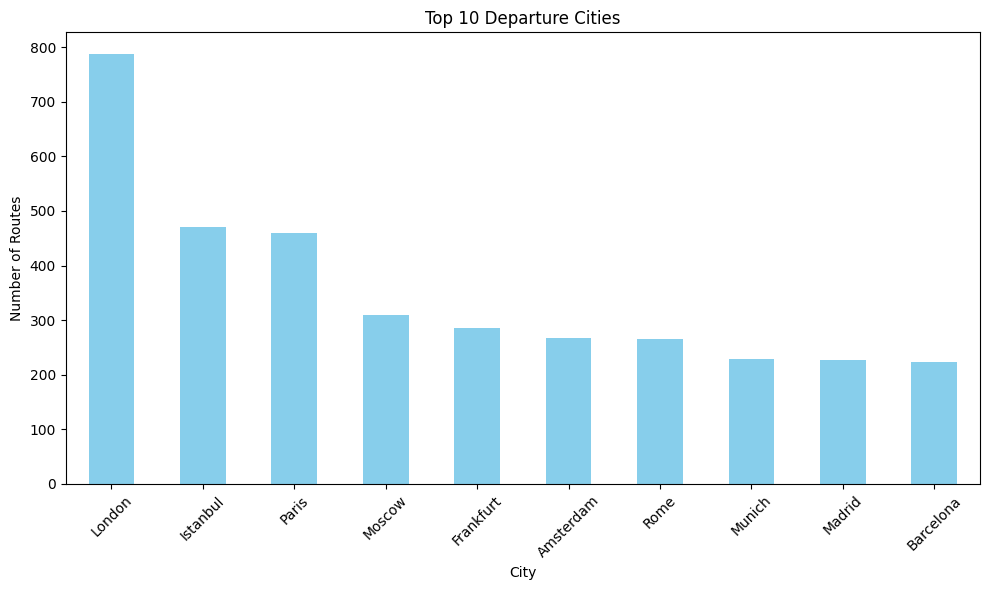

In [126]:
plt.figure(figsize=(10,6))
top_departure.plot(kind='bar', color='skyblue')
plt.title("Top 10 Departure Cities")
plt.xlabel("City")
plt.ylabel("Number of Routes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

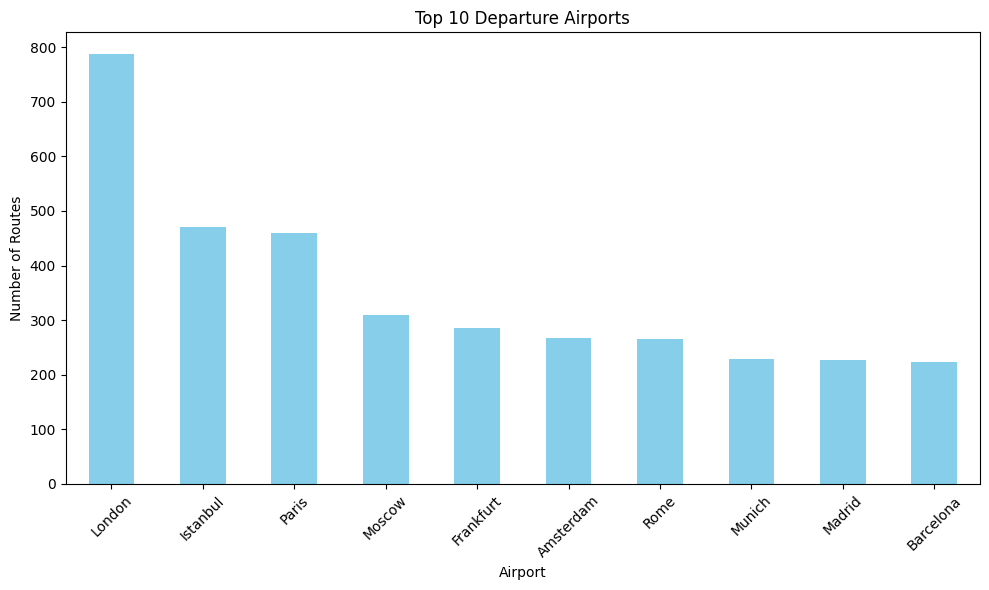

In [127]:
plt.figure(figsize=(10,6))
top_departure_iata.plot(kind='bar', color='skyblue')
plt.title("Top 10 Departure Airports")
plt.xlabel("Airport")
plt.ylabel("Number of Routes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Arrivals

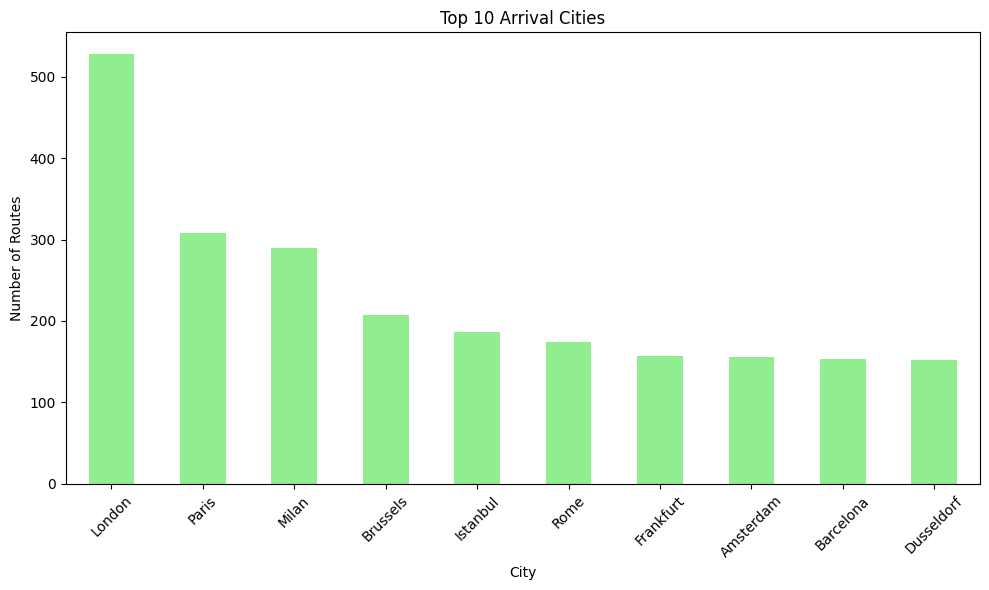

In [128]:
plt.figure(figsize=(10,6))
top_arrival.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Arrival Cities")
plt.xlabel("City")
plt.ylabel("Number of Routes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

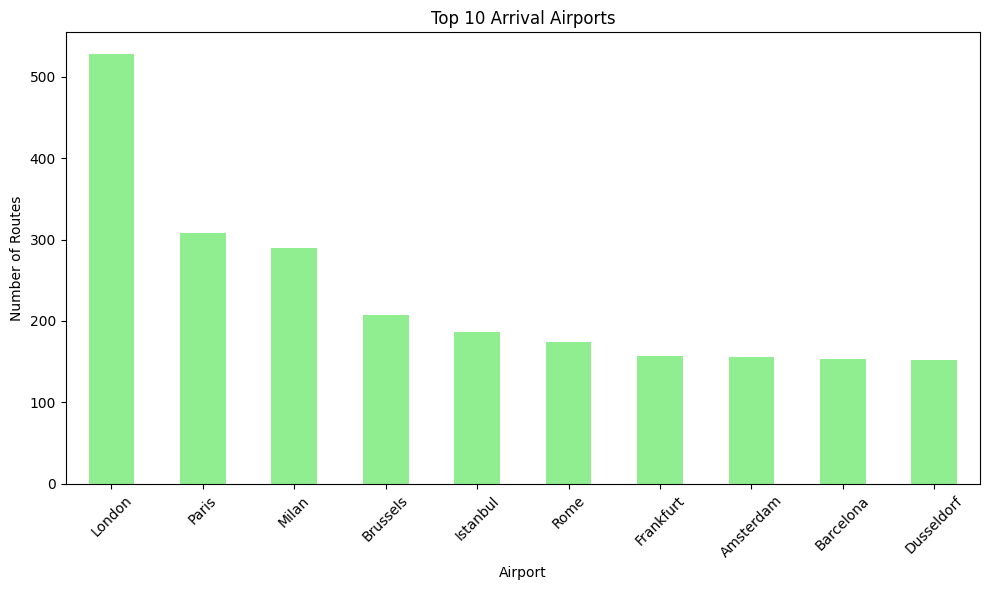

In [129]:
plt.figure(figsize=(10,6))
top_arrival_iata.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Arrival Airports")
plt.xlabel("Airport")
plt.ylabel("Number of Routes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Flight Time

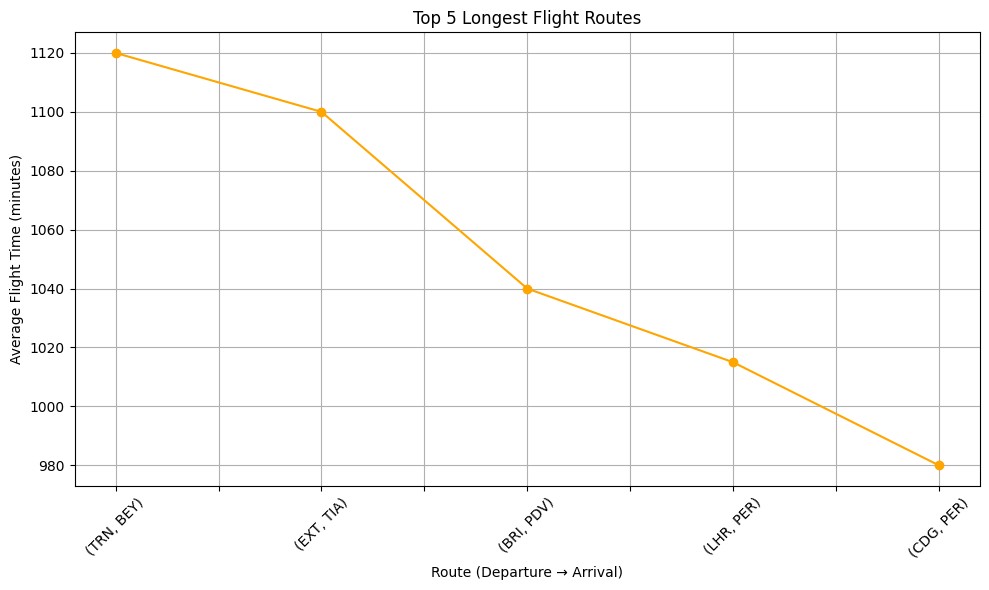

In [130]:
top_longest_routes_dia = df.groupby(['iata_from', 'iata_to'])['common_duration'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
top_longest_routes_dia.plot(kind='line', marker='o', color='orange')
plt.title("Top 5 Longest Flight Routes")
plt.xlabel("Route (Departure → Arrival)")
plt.ylabel("Average Flight Time (minutes)")
plt.xticks(rotation=45)  # Labels lesbar machen
plt.grid(True)
plt.tight_layout()
plt.show()

Flight Prices

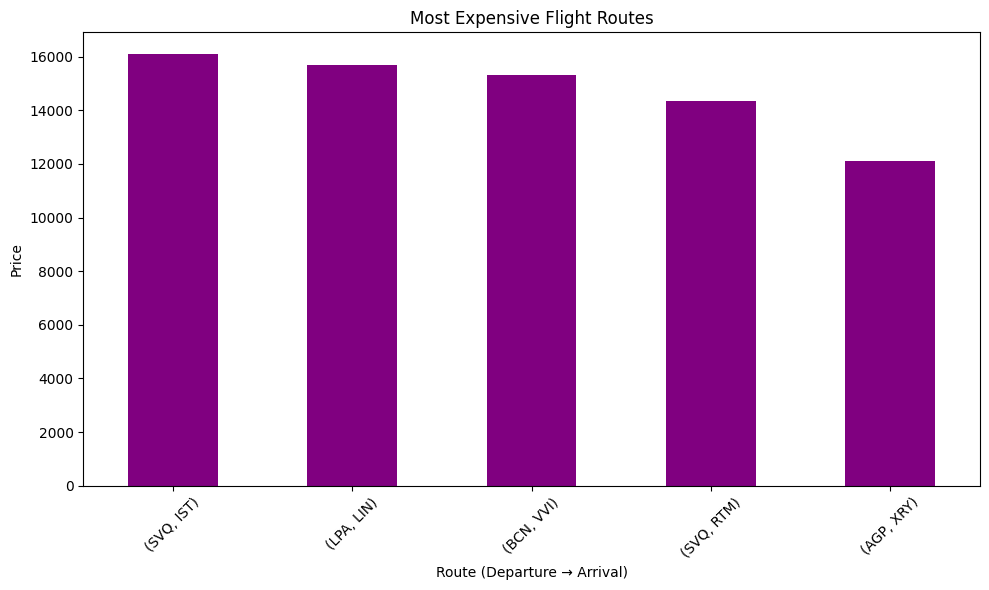

In [131]:
most_exp_routes_dia = df.groupby(['iata_from', 'iata_to'])['price'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
most_exp_routes_dia.plot(kind='bar', color='purple')
plt.title("Most Expensive Flight Routes")
plt.xlabel("Route (Departure → Arrival)")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top Routes

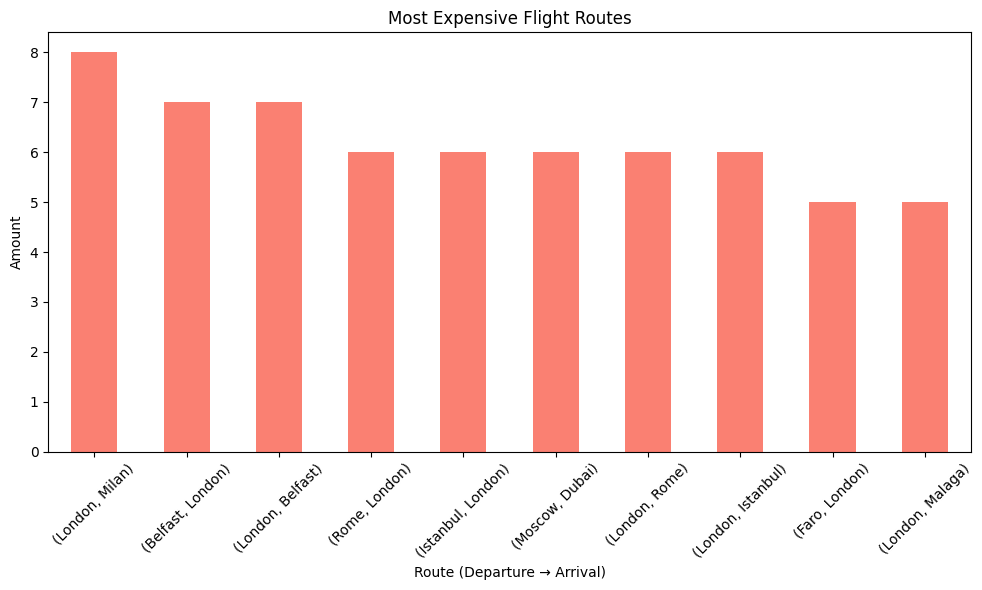

In [132]:
plt.figure(figsize=(10,6))
top_routes.plot(kind='bar', color='salmon')
plt.title("Most Expensive Flight Routes")
plt.xlabel("Route (Departure → Arrival)")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()